<a href="https://colab.research.google.com/github/empios/175IC-machine-learning/blob/main/Zadanie7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ZAD 1


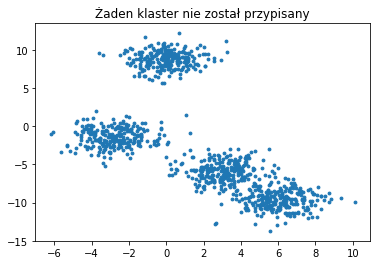

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

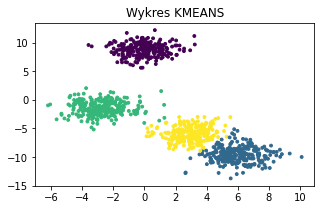

Wynik Kmeans

1    255
2    252
0    250
3    243
Name: 1, dtype: int64

Wynik DBSCAN

 0    232
 2    230
 3    226
 1    224
-1     88
Name: cluster, dtype: int64
W KMEANS dla 0: 18 więcej punktów w klasie
W KMEANS dla 1: 51 więcej punktów w klasie
W KMEANS dla 2: 22 więcej punktów w klasie
W KMEANS dla 3: 17 więcej punktów w klasie


In [16]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

data, _ = make_blobs(n_samples=1000, centers=4, cluster_std=1.2,random_state=360)
df = pd.DataFrame(data, columns=['x1','x2'])
px.scatter(df,'x1','x2')

print("ZAD 1")
cluster = DBSCAN(eps=0.6,min_samples=7)
cluster.fit(data)
df['cluster'] = cluster.labels_
px.scatter(df,'x1','x2','cluster',color_continuous_midpoint=0)

plt.scatter(df['x1'], df['x2'], s=8)
plt.title("Żaden klaster nie został przypisany")
for i in range(1,5):
    plt.figure(figsize=(5, 3))
    y_pred = KMeans(n_clusters=i, random_state=360).fit_predict(df)
plt.scatter(df['x1'], df['x2'], c=y_pred, s=8)
plt.title("Wykres KMEANS")
plt.show();

results = pd.DataFrame([df.index,y_pred]).T
print('Wynik Kmeans\n')
print(results[1].value_counts())
print('\nWynik DBSCAN\n')
print(df['cluster'].value_counts())
print('W KMEANS dla 0: 18 więcej punktów w klasie')
print('W KMEANS dla 1: 51 więcej punktów w klasie')
print('W KMEANS dla 2: 22 więcej punktów w klasie')
print('W KMEANS dla 3: 17 więcej punktów w klasie')
print('KMEANS przypisał więcej punktów ponieważ wziął wszystkie punkty do którejś klasy natomiast DBSCAN posiada wolne punkty -1 w ilości 88')